In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import warnings 
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [3]:
df = pd.read_csv(r"M:\RESHMA\ihub\New folder\Stress_Dataset.csv")

In [4]:
df.describe()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Do you find that your relationship often causes you stress?,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?
count,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,...,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000
mean,0.349941,20.071174,2.997628,2.755635,2.543298,2.786477,2.663108,2.628707,2.702254,2.699881,...,2.514828,2.447212,2.488731,2.517200,2.424674,2.581257,2.641756,2.756821,3.258600,2.398577
std,0.477234,5.429502,1.134639,1.118650,1.201330,1.266959,1.266376,1.266593,1.314213,1.313673,...,1.241869,1.195995,1.196116,1.247563,1.256795,1.288163,1.305848,1.263008,1.202543,1.112485
min,0.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,19.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000
50%,0.000000,19.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000
75%,1.000000,20.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000
max,1.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                843 non-null    int64 
 1   Age                                                                   843 non-null    int64 
 2   Have you recently experienced stress in your life?                    843 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               843 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             843 non-null    int64 
 7   Have you

In [6]:
df.head()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


In [7]:
df.tail()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
838,0,21,3,4,2,3,5,1,5,4,...,2,3,3,3,4,1,2,2,2,Eustress (Positive Stress) - Stress that motiv...
839,1,19,3,2,1,2,2,1,2,3,...,1,1,1,3,2,1,2,3,1,No Stress - Currently experiencing minimal to ...
840,1,19,4,4,3,4,3,2,2,3,...,2,2,2,2,3,1,4,5,3,Eustress (Positive Stress) - Stress that motiv...
841,0,20,5,4,3,4,3,4,4,4,...,2,2,1,4,3,5,4,5,1,Eustress (Positive Stress) - Stress that motiv...
842,0,19,4,3,1,3,2,1,1,4,...,1,1,3,1,1,2,2,5,4,Eustress (Positive Stress) - Stress that motiv...


In [8]:
df.isnull().sum() #To find the missing values

Gender                                                                  0
Age                                                                     0
Have you recently experienced stress in your life?                      0
Have you noticed a rapid heartbeat or palpitations?                     0
Have you been dealing with anxiety or tension recently?                 0
Do you face any sleep problems or difficulties falling asleep?          0
Have you been dealing with anxiety or tension recently?.1               0
Have you been getting headaches more often than usual?                  0
Do you get irritated easily?                                            0
Do you have trouble concentrating on your academic tasks?               0
Have you been feeling sadness or low mood?                              0
Have you been experiencing any illness or health issues?                0
Do you often feel lonely or isolated?                                   0
Do you feel overwhelmed with your acad

In [9]:
df.duplicated().sum() #To check if any dulpicate rows are present

np.int64(27)

In [10]:
df[df.duplicated()] #To find the duplicated rows

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
534,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
566,1,17,3,3,4,4,3,4,5,2,...,2,2,3,2,2,3,4,3,2,Eustress (Positive Stress) - Stress that motiv...
568,0,21,4,4,2,4,5,5,4,5,...,4,3,4,4,3,3,2,5,2,Distress (Negative Stress) - Stress that cause...
571,0,21,3,2,4,3,3,2,1,5,...,2,2,1,4,3,1,1,3,4,Eustress (Positive Stress) - Stress that motiv...
572,0,21,3,4,4,1,2,3,4,4,...,1,1,3,1,1,2,3,4,2,Eustress (Positive Stress) - Stress that motiv...
622,0,19,1,3,2,5,5,5,5,5,...,1,1,1,2,2,1,2,3,2,Eustress (Positive Stress) - Stress that motiv...
625,0,20,2,3,2,1,2,2,4,2,...,1,1,1,2,3,2,2,3,2,Eustress (Positive Stress) - Stress that motiv...
626,0,19,2,1,2,2,3,3,1,2,...,2,2,3,2,2,2,2,2,4,Eustress (Positive Stress) - Stress that motiv...
724,0,22,2,3,4,2,2,4,4,2,...,3,4,2,2,3,4,1,5,4,Eustress (Positive Stress) - Stress that motiv...
725,0,21,1,1,2,1,2,1,4,5,...,2,2,2,2,1,3,5,3,1,Eustress (Positive Stress) - Stress that motiv...


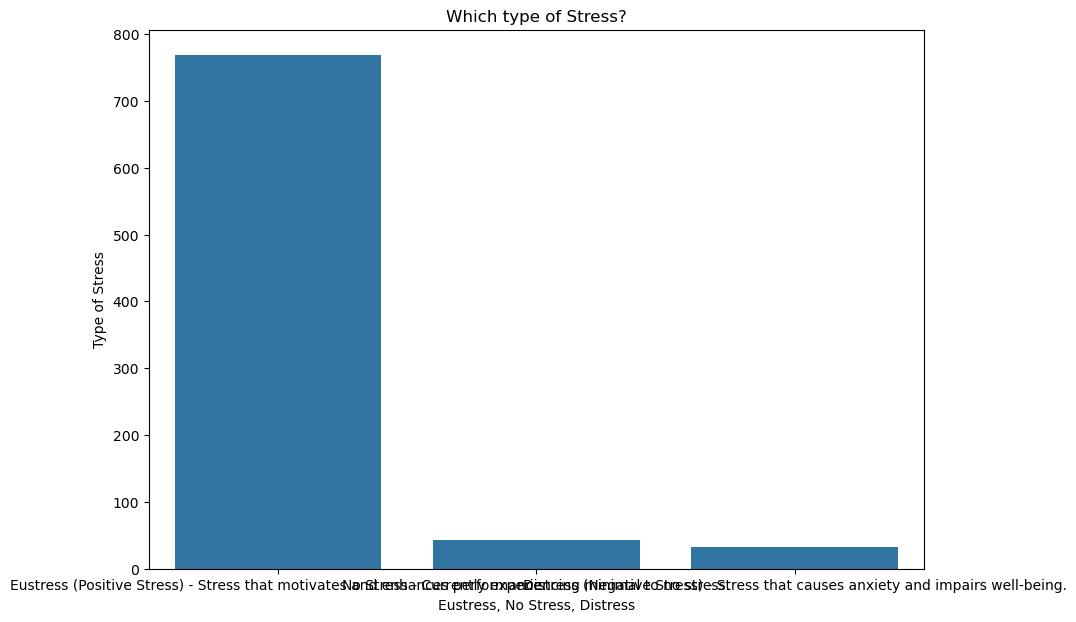

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['Which type of stress do you primarily experience?'])
plt.title("Which type of Stress?")
plt.xlabel("Eustress, No Stress, Distress")
plt.ylabel("Type of Stress")
plt.show()


In [12]:
df['Which type of stress do you primarily experience?'].unique()

array(['Eustress (Positive Stress) - Stress that motivates and enhances performance.',
       'No Stress - Currently experiencing minimal to no stress.',
       'Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.'],
      dtype=object)

In [13]:
#define target variable
target_col = "Which type of stress do you primarily experience?"
y = df[target_col]

In [14]:
#Seperate the features except the target
X = df.drop(columns = [target_col])


Using Label Encoder for the target column as there are 3 categorical values. 


In [15]:
le = LabelEncoder()
y = le.fit_transform(y)

In [16]:
#print encoding mapping
print("Stress type encoding:")
for i, class_name in enumerate(le.classes_):
    print(f" {class_name} : {i}")
#print result info
print("\n X.dtypes after processing :\n",X.dtypes)
print("\n Stress type class counts:", pd.Series(y).value_counts().sort_index())

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    



Stress type encoding:
 Distress (Negative Stress) - Stress that causes anxiety and impairs well-being. : 0
 Eustress (Positive Stress) - Stress that motivates and enhances performance. : 1
 No Stress - Currently experiencing minimal to no stress. : 2

 X.dtypes after processing :
 Gender                                                                  int64
Age                                                                     int64
Have you recently experienced stress in your life?                      int64
Have you noticed a rapid heartbeat or palpitations?                     int64
Have you been dealing with anxiety or tension recently?                 int64
Do you face any sleep problems or difficulties falling asleep?          int64
Have you been dealing with anxiety or tension recently?.1               int64
Have you been getting headaches more often than usual?                  int64
Do you get irritated easily?                                            int64
Do you have trou

In [17]:
from sklearn.feature_selection import mutual_info_classif


# Compute MI scores (returns numpy array)
mi_array = mutual_info_classif(X, y, random_state=0)

# Convert to Pandas Series (with feature names as index)
mi_scores = pd.Series(mi_array, index=X.columns)

# Sort scores for plotting
mi_scores = mi_scores.sort_values(ascending=True)

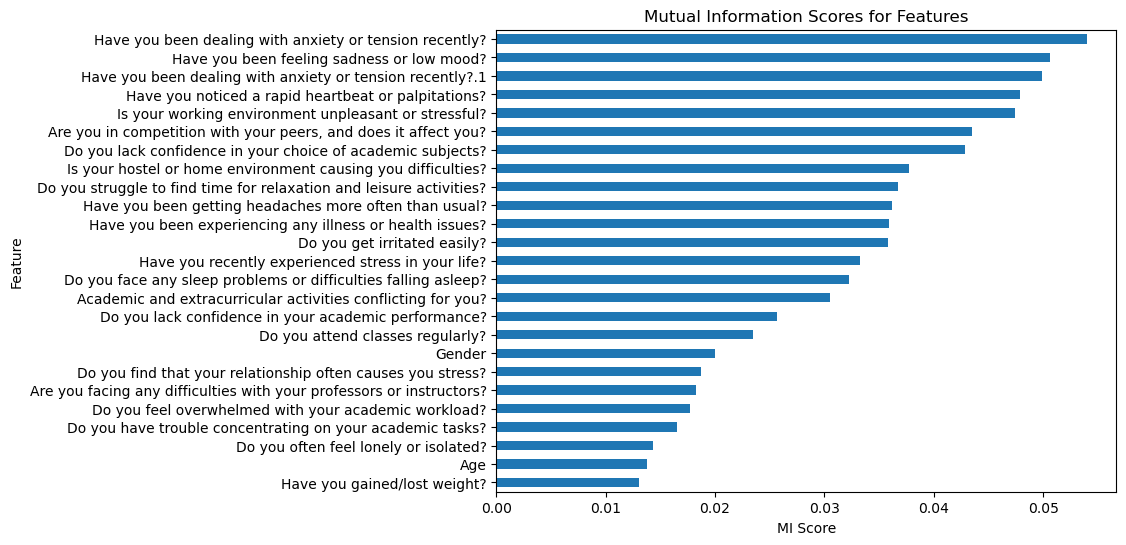

In [18]:


# Plot horizontal bar chart
plt.figure(figsize=(8,6))
mi_scores.plot(kind='barh')
plt.title("Mutual Information Scores for Features")
plt.xlabel("MI Score")
plt.ylabel("Feature")
plt.show()

In [19]:
df.columns.values[6] = "Are you finding difficulty to concentrate in studies?"

In [20]:
df.head()


,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Are you finding difficulty to concentrate in studies?,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


In [21]:
#SVM 
svm_classifier = SVC(kernel ='linear')

In [22]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [28]:

pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2)), ('svc', SVC())])

In [29]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('svc', SVC())])

In [30]:
SVC(class_weight='balanced')

SVC(class_weight='balanced')

In [31]:
y_pred = svm_classifier.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)

In [66]:
print(f"Accuracy:{accuracy}")

Accuracy:0.990521327014218


In [39]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision per class:", precision)

Precision per class: [1.         0.98969072 1.        ]


In [42]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.875      1.         0.90909091]


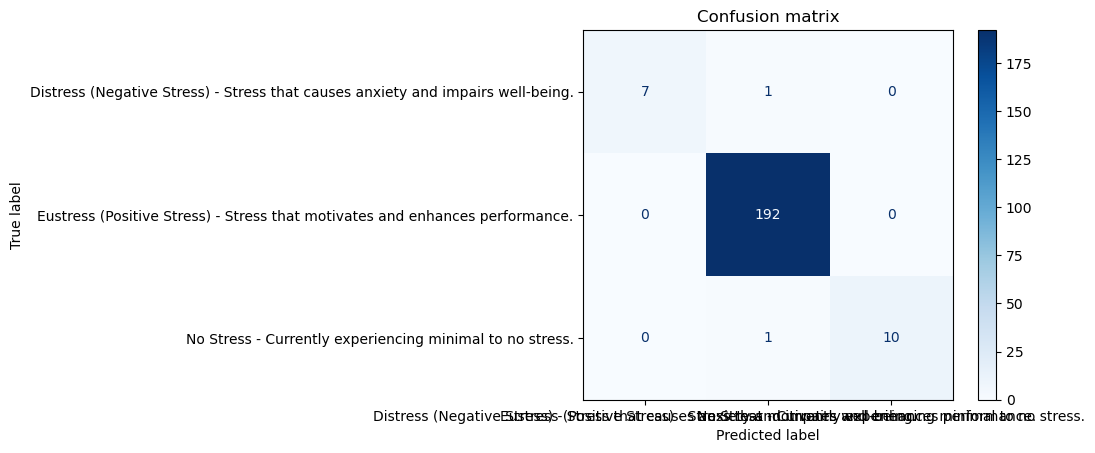

In [44]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion matrix")
plt.show()

In [45]:
#To save the model use joblib
import joblib

joblib.dump(svm_classifier, 'trained_model.joblib')

loaded_model = joblib.load('trained_model.joblib')


In [46]:
loaded_model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [48]:
# Testing 
test_values = [[0, 20, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2]]   # put values in same order as your training data columns
prediction = loaded_model.predict(test_values)
print("Prediction:", prediction)
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")



Prediction: [1]
